In [7]:
!pip install librosa

  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320724 sha256=69d4688640fbdcd66af0530a5c793d548c9446e31eca5191fa4c07c811d65bec
  Stored in directory: c:\users\karan\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23146 sha256=47df75e5bfb473cc3f447cceb09c95b2464c344404b5c0a18e947539827abd75
  Stored in directory: c:\users\karan\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
Successfully built resampy audioread


In [1]:
!pip install python_speech_features

In [10]:
!pip install tensorflow

  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30710 sha256=96ae0f14a51eedea4f1185422bc60bd88c39cdf6722cf722ab39fa037475f267
  Stored in directory: c:\users\karan\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=f92db479111ff07ea8e3130a0d1ad2fd5800a56913f76fd6c36bcd8f7b1982ff
  Stored in directory: c:\users\karan\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=fdc5731cfe393786c5d85b8df4c3d56f8e444d9f18db32016023071c5d893430
  Stored in directory: c:\users\karan\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built clang wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfu

In [11]:
import numpy as np 
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import random 
import operator
import math

In [15]:
df = pd.read_csv("C:\\Users\\Karan\\Downloads\\Data\\features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [16]:
df.shape

(9990, 60)

In [17]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [18]:
df=df.drop(labels="filename",axis=1)

In [19]:
audio_recording="C:\\Users\\Karan\\Downloads\\Data\\genres_original\\country\\country.00050.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [20]:
librosa.load(audio_recording,sr=45600)

(array([ 0.04582627,  0.06254332,  0.0583379 , ..., -0.13857861,
        -0.11823352, -0.05911855], dtype=float32),
 45600)

Playing Audio

In [21]:
import IPython
IPython.display.Audio(data,rate=sr)

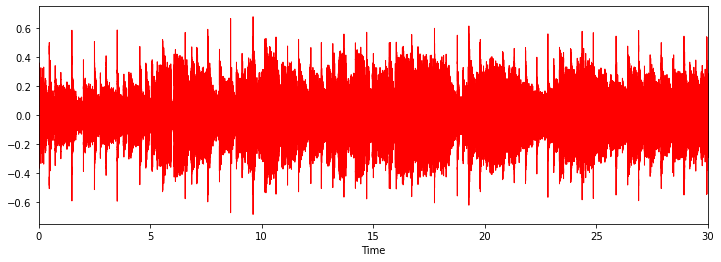

In [56]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,color="#ff0000")
plt.show()

C:\Users\Karan\anaconda3\lib\site-packages\librosa\display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


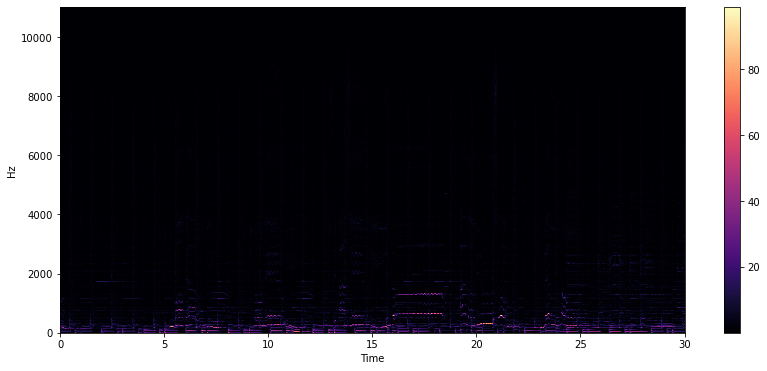

In [23]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

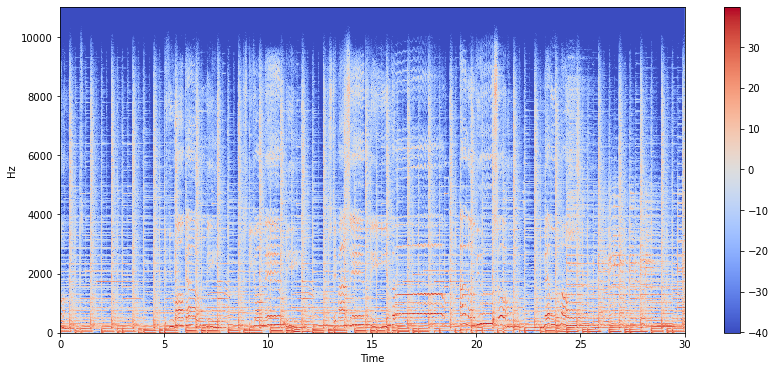

In [24]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

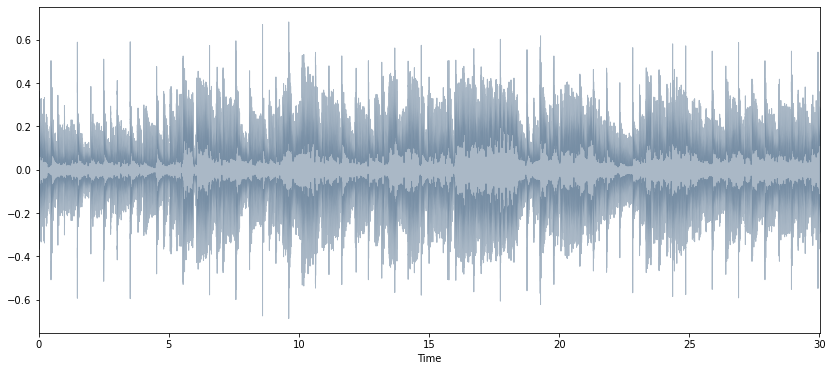

In [25]:
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveplot(data,sr=sr,alpha=0.4,color="#2B4F72")

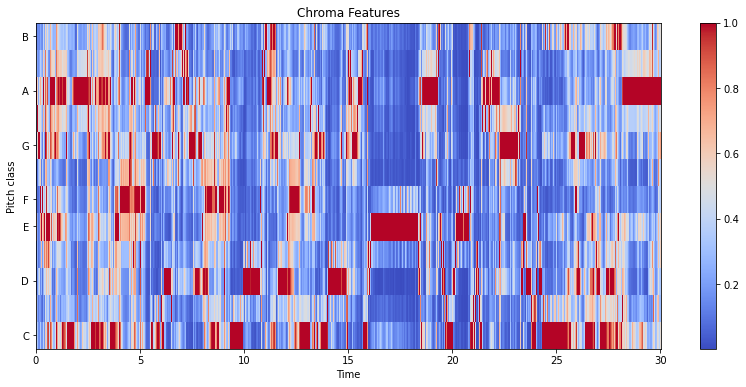

In [26]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(14,6))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

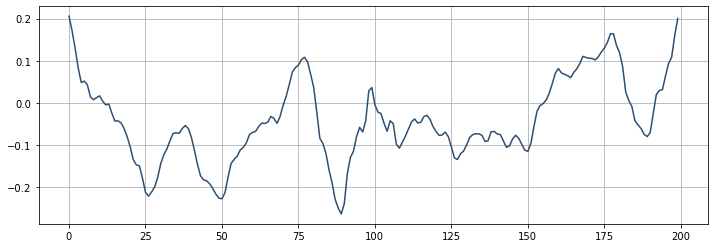

In [27]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

In [28]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("the numbert of zero_crossings is :", sum(zero_cross_rate))

the numbert of zero_crossings is : 8


# Feature Extraction

In [29]:
class_list=df.iloc[:,-1]
converter=LabelEncoder()

In [30]:
y=converter.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [31]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

Spliting Dataset

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [45]:
len(y_test)

1998

In [46]:
len(y_train)

7992

# Buidling the model

In [47]:
from tensorflow.keras.models import Sequential

In [48]:
def trainModel(model,epochs,optimizer):
    batch_size=128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [49]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [50]:
import tensorflow as tf

In [51]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10,activation='softmax'),
])

print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               30208     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

Model Evaluation

In [55]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=128)
print("Test loss :  ",test_loss)
print("Best Accuracy : ",test_acc*100)

16/16 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.9329
Test loss :   0.564812958240509
Best Accuracy :  93.29329133033752


In [ ]:
def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [ ]:
def nearestClass(neighbors):
    classVote = {}

    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response]+=1 
        else:
            classVote[response]=1

    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [ ]:
def getAccuracy(testSet, predictions):
    correct = 0 
    for x in range (len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return 1.0*correct/len(testSet)

In [ ]:
def distance(instance1 , instance2 , k ):
    distance =0 
    mm1 = instance1[0] 
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1)) 
    distance+=(np.dot(np.dot((mm2-mm1).transpose() , np.linalg.inv(cm2)) , mm2-mm1 )) 
    distance+= np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance-= k
    return distance

In [ ]:
directory = r"C:/Users/Admin/Desktop/genres/"
f= open("my.dat" ,'wb')
i=0
for folder in os.listdir(directory):
    i+=1
    print(folder)
    if i==11 :
        print(folder)
        break   
    fdir= directory+folder
    if os.path.isdir(fdir):
        for file in os.listdir(fdir):  
            (rate,sig) = wav.read(fdir+"/"+file)
            mfcc_feat = mfcc(sig,rate ,winlen=0.020, appendEnergy = False)
            covariance = np.cov(np.matrix.transpose(mfcc_feat))
            mean_matrix = mfcc_feat.mean(0)
            feature = (mean_matrix , covariance , i)
            pickle.dump(feature , f)
            print(file)
f.close()

In [ ]:
dataset = []
def loadDataset(filename , split , trSet , teSet):
    with open("my.dat" , 'rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break  

    for x in range(len(dataset)):
        if random.random() <split :      
            trSet.append(dataset[x])
        else:
            teSet.append(dataset[x])  

trainingSet = []
testSet = []
loadDataset("my.dat" , 0.66, trainingSet, testSet)

In [ ]:
leng = len(testSet)
predictions = []
for x in range (leng):
    predictions.append(nearestClass(getNeighbors(trainingSet ,testSet[x] , 5))) 

accuracy1 = getAccuracy(testSet , predictions)
print(accuracy1)

In [ ]:
from collections import defaultdict
results=defaultdict(int)

In [ ]:
i=1
for folder in os.listdir("C:/Users/Admin/Desktop/genres"):
    results[i]=folder
    i+=1
print(results)

In [ ]:
(rate,sig)=wav.read("C:/Users/Admin/Desktop/music_speech/music_wav/hendrix.wav")
mfcc_feat=mfcc(sig,rate,winlen=0.020,appendEnergy=False)
covariance = np.cov(np.matrix.transpose(mfcc_feat))
mean_matrix = mfcc_feat.mean(0)
feature=(mean_matrix,covariance,0)

In [ ]:
pred=nearestClass(getNeighbors(dataset ,feature , 5))

In [ ]:
print(results[pred])